In [1]:
# First, install the yfinance package if not already installed
# !pip install yfinance

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, timedelta

# Define the list of companies (tickers)
# For Indian stocks on Yahoo Finance, we need to add .NS suffix for NSE listings
tickers = ['RELIANCE.NS', 'ONGC.NS', 'IOC.NS', 'BPCL.NS', 'CHENNPETRO.NS', 'OIL.NS', 'PETRONET.NS', 'MRPL.NS']

# Calculate date range (5 years)
end_date = "2025-01-01"
start_date = "2020-01-01"

print(f"Downloading data from {start_date} to {end_date}")

# Initialize an empty DataFrame to store adjusted closing prices
adj_close_df = pd.DataFrame()

# Download data for all tickers at once (more efficient with yfinance)
try:
    # Get historical data from Yahoo Finance
    stock_data = yf.download(tickers,
                             start=start_date,
                             end=end_date,
                             interval="1d",
                             auto_adjust=False,
                             progress=False)
    
    # Extract the adjusted closing price
    if not stock_data.empty:
        # For multiple tickers, Yahoo returns a multi-level column DataFrame
        # We want the 'Adj Close' for each ticker
        adj_close_df = stock_data['Adj Close']
        print("Successfully downloaded data for all tickers")
    else:
        print("No data found for the specified tickers")
except Exception as e:
    print(f"Error downloading data: {e}")

# Check if the DataFrame is empty before proceeding
if adj_close_df.empty:
    print("No data was downloaded. Please check your internet connection or if the Yahoo Finance API is available.")
else:
    # Set the index name
    adj_close_df.index.name = 'Date'

    # Display the first few rows of the DataFrame
    print("\nDataFrame Shape:", adj_close_df.shape)
    print("\nFirst 5 rows:")
    print(adj_close_df.head())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(adj_close_df.describe())

    # Check for missing values
    missing_values = adj_close_df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing_values)

    # Save the DataFrame to a CSV file
    adj_close_df.to_csv('oil_gas_stocks_5yr.csv')
    print("\nData saved to 'oil_gas_stocks_5yr.csv'")

Successfully downloaded data for all tickers

DataFrame Shape: (1238, 8)

First 5 rows:
Ticker         BPCL.NS  CHENNPETRO.NS     IOC.NS    MRPL.NS     OIL.NS  \
Date                                                                     
2020-01-01  176.905075     108.836548  56.667084  43.025349  73.252937   
2020-01-02  175.429810     111.317154  57.139492  43.320717  73.662041   
2020-01-03  173.972534     108.659363  57.072006  43.271492  75.057793   
2020-01-06  168.809143     102.280655  56.194660  42.286930  74.047081   
2020-01-07  165.876617     100.996063  56.037189  42.434612  74.335846   

Ticker        ONGC.NS  PETRONET.NS  RELIANCE.NS  
Date                                             
2020-01-01  89.992096   210.544708   687.708984  
2020-01-02  90.415741   212.400589   699.416870  
2020-01-03  90.698174   212.637512   700.259644  
2020-01-06  89.144768   210.742142   684.019043  
2020-01-07  88.791718   213.980087   694.542419  

Basic Statistics:
Ticker      BPCL.NS  CHE


Pearson Correlation Matrix:
Ticker          BPCL.NS  CHENNPETRO.NS    IOC.NS   MRPL.NS    OIL.NS  \
Ticker                                                                 
BPCL.NS        1.000000       0.869910  0.931112  0.887618  0.930918   
CHENNPETRO.NS  0.869910       1.000000  0.970341  0.978648  0.922890   
IOC.NS         0.931112       0.970341  1.000000  0.970101  0.952821   
MRPL.NS        0.887618       0.978648  0.970101  1.000000  0.912875   
OIL.NS         0.930918       0.922890  0.952821  0.912875  1.000000   
ONGC.NS        0.886801       0.951318  0.980146  0.939555  0.959177   
PETRONET.NS    0.924652       0.841369  0.873403  0.839595  0.937616   
RELIANCE.NS    0.703909       0.804900  0.830346  0.805193  0.777462   

Ticker          ONGC.NS  PETRONET.NS  RELIANCE.NS  
Ticker                                             
BPCL.NS        0.886801     0.924652     0.703909  
CHENNPETRO.NS  0.951318     0.841369     0.804900  
IOC.NS         0.980146     0.873403     0

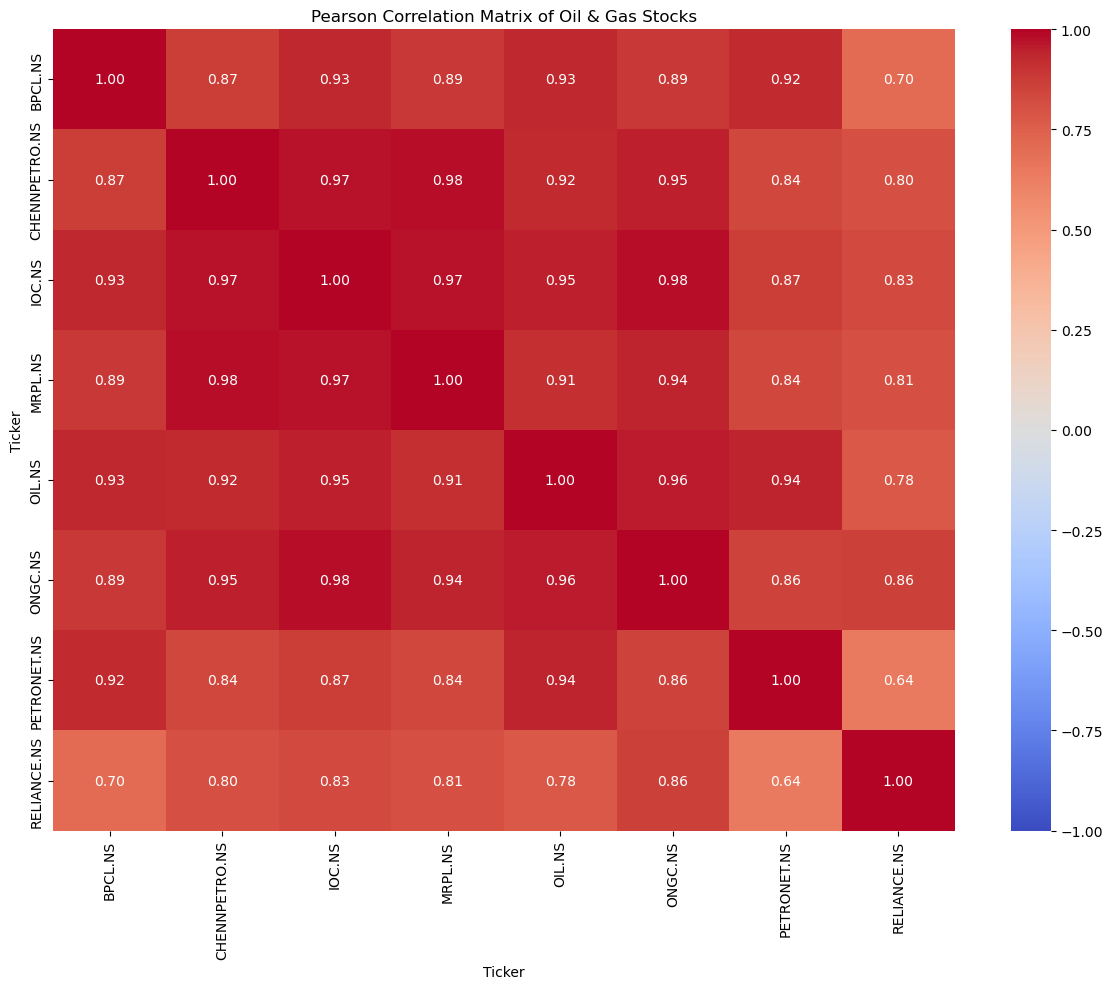


Highly Correlated Pairs (ρ > 0.8):
          Stock 1        Stock 2  Correlation
14         IOC.NS        ONGC.NS     0.980146
7   CHENNPETRO.NS        MRPL.NS     0.978648
6   CHENNPETRO.NS         IOC.NS     0.970341
12         IOC.NS        MRPL.NS     0.970101
21         OIL.NS        ONGC.NS     0.959177
13         IOC.NS         OIL.NS     0.952821
9   CHENNPETRO.NS        ONGC.NS     0.951318
18        MRPL.NS        ONGC.NS     0.939555
22         OIL.NS    PETRONET.NS     0.937616
1         BPCL.NS         IOC.NS     0.931112
3         BPCL.NS         OIL.NS     0.930918
5         BPCL.NS    PETRONET.NS     0.924652
8   CHENNPETRO.NS         OIL.NS     0.922890
17        MRPL.NS         OIL.NS     0.912875
2         BPCL.NS        MRPL.NS     0.887618
4         BPCL.NS        ONGC.NS     0.886801
15         IOC.NS    PETRONET.NS     0.873403
0         BPCL.NS  CHENNPETRO.NS     0.869910
24        ONGC.NS    RELIANCE.NS     0.862889
23        ONGC.NS    PETRONET.NS     0.85795

In [3]:
# Finding companies pairs with very high correlation

# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Pearson correlation matrix
correlation_matrix = adj_close_df.corr(method='pearson')
# Display the correlation matrix
print("\nPearson Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Pearson Correlation Matrix of Oil & Gas Stocks')
plt.tight_layout()
plt.show()

# Find highly correlated pairs (ρ > 0.8)
# We'll create a DataFrame to store the pairs
high_corr_pairs = []

# Loop through the correlation matrix to find pairs with correlation > 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  # Start from i+1 to avoid duplicates and self-correlations
        if correlation_matrix.iloc[i, j] > 0.8:
            stock1 = correlation_matrix.columns[i]
            stock2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append({
                'Stock 1': stock1,
                'Stock 2': stock2,
                'Correlation': corr_value
            })

# Convert to DataFrame and sort by correlation value (descending)
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', ascending=False)
    
    print("\nHighly Correlated Pairs (ρ > 0.8):")
    print(high_corr_df)
    
    # Save the highly correlated pairs to a CSV file
    high_corr_df.to_csv('high_correlation_pairs.csv', index=False)
    print("\nHighly correlated pairs saved to 'high_correlation_pairs.csv'")
else:
    print("\nNo stock pairs with correlation > 0.8 were found.")



Performing Engle–Granger cointegration tests...
 Tested IOC.NS vs ONGC.NS: Cointegrated (p=0.0133)
 Tested CHENNPETRO.NS vs MRPL.NS: Not Cointegrated (p=0.0598)
 Tested CHENNPETRO.NS vs IOC.NS: Not Cointegrated (p=0.2797)
 Tested IOC.NS vs MRPL.NS: Not Cointegrated (p=0.1882)
 Tested OIL.NS vs ONGC.NS: Not Cointegrated (p=0.4731)
 Tested IOC.NS vs OIL.NS: Not Cointegrated (p=0.1335)
 Tested CHENNPETRO.NS vs ONGC.NS: Not Cointegrated (p=0.3727)
 Tested MRPL.NS vs ONGC.NS: Not Cointegrated (p=0.3944)
 Tested OIL.NS vs PETRONET.NS: Cointegrated (p=0.0433)
 Tested BPCL.NS vs IOC.NS: Not Cointegrated (p=0.5101)
 Tested BPCL.NS vs OIL.NS: Cointegrated (p=0.0430)
 Tested BPCL.NS vs PETRONET.NS: Not Cointegrated (p=0.0844)
 Tested CHENNPETRO.NS vs OIL.NS: Not Cointegrated (p=0.4352)
 Tested MRPL.NS vs OIL.NS: Not Cointegrated (p=0.6007)
 Tested BPCL.NS vs MRPL.NS: Not Cointegrated (p=0.3100)
 Tested BPCL.NS vs ONGC.NS: Not Cointegrated (p=0.3716)
 Tested IOC.NS vs PETRONET.NS: Not Cointegrate

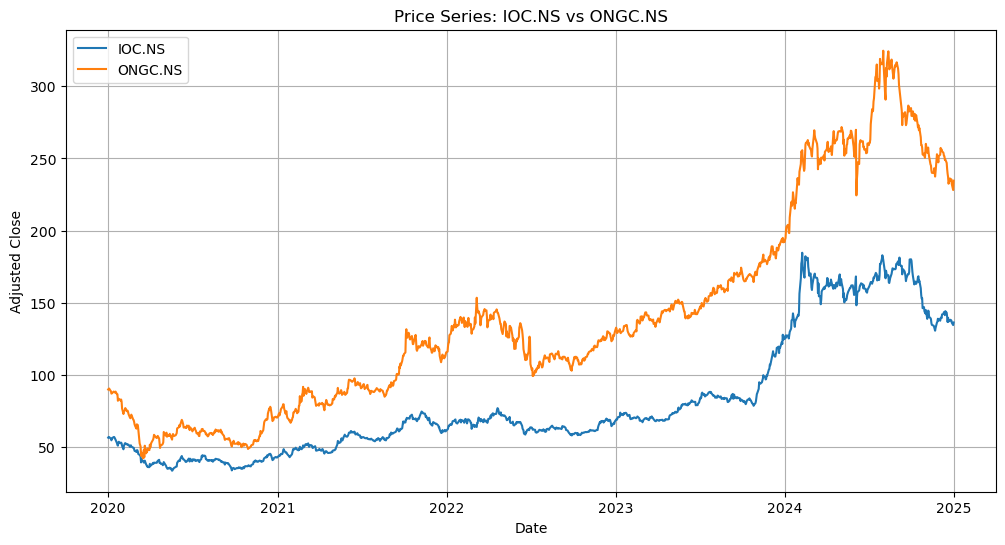

In [4]:
# Cointegration testing to ensure long-term equilibrium relationship

from statsmodels.tsa.stattools import coint

def engle_granger_test(df, stock1, stock2, significance=0.05):
    '''Function to perform Engle-Granger cointegration test'''
    # Keep only rows where both series have data
    data = df[[stock1, stock2]].dropna()
    
    score, p_value, _ = coint(data[stock1], data[stock2])
    
    return {
        'Stock 1': stock1,
        'Stock 2': stock2,
        'Test Statistic': score,
        'p_value': p_value,
        'Cointegrated': p_value < significance
    }

# Assume `high_corr_df` is your DataFrame of previously selected pairs, with columns ['Stock 1', 'Stock 2', 'Correlation']
cointegration_results = []

print("\nPerforming Engle–Granger cointegration tests...")
for _, row in high_corr_df.iterrows():
    s1, s2 = row['Stock 1'], row['Stock 2']
    try:
        res = engle_granger_test(adj_close_df, s1, s2)
        res['Correlation'] = row['Correlation']
        cointegration_results.append(res)
        status = "Cointegrated" if res['Cointegrated'] else "Not Cointegrated"
        print(f" Tested {s1} vs {s2}: {status} (p={res['p_value']:.4f})")
    except Exception as e:
        print(f" Error testing {s1} vs {s2}: {e}")

# Build DataFrame only if we have results
if cointegration_results:
    cointegration_df = pd.DataFrame(cointegration_results)
    
    # Now filter safely on p_value
    cointegrated_pairs = cointegration_df.loc[
        cointegration_df['p_value'] < 0.05,
        ['Stock 1','Stock 2','Correlation','Test Statistic','p_value']
    ]
    
    if not cointegrated_pairs.empty:
        print("\nCointegrated Pairs (p < 0.05):")
        print(cointegrated_pairs.to_string(index=False))
        cointegrated_pairs.to_csv('cointegrated_pairs.csv', index=False)
        print("\nSaved to 'cointegrated_pairs.csv'")
        
        # Plot the first cointegrated pair
        s1, s2 = cointegrated_pairs.iloc[0][['Stock 1','Stock 2']]
        plt.figure(figsize=(12,6))
        plt.plot(adj_close_df[s1], label=s1)
        plt.plot(adj_close_df[s2], label=s2)
        plt.title(f'Price Series: {s1} vs {s2}')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("\nNo pairs cointegrated at the 5% level.")
else:
    print("No cointegration tests were run (no high-correlation pairs found).")


In [66]:
# Generating trade signal

import statsmodels.api as sm

def compute_spread_and_hedge_ratio(price_a: pd.Series,
                                   price_b: pd.Series):
    """Regress A on B to get hedge_ratio (β), then compute spread = A - β * B"""
    # Align indices, drop NaNs
    df = pd.concat([price_a, price_b], axis=1).dropna()
    A = df.iloc[:,0]
    B = df.iloc[:,1]
    
    # Add constant to B for intercept (optional)
    model = sm.OLS(A, sm.add_constant(B)).fit()
    beta = model.params[1]
    
    spread = A - beta * B
    return spread, beta

def generate_zscore_signals(spread: pd.Series,
                            lookback: int = 60,
                            entry_z: float = 2.0,
                            exit_z: float = 0.5):
    """
    Given a spread series, compute rolling z-score and generate signals:
        1  -> long the spread (buy A, sell B)
        -1  -> short the spread (sell A, buy B)
        0  -> exit any position
    Positions are carried forward until an exit signal appears.
    """
    df = pd.DataFrame(spread.rename("spread"))
    df["mean"] = df["spread"].rolling(window=lookback).mean()
    df["std"]  = df["spread"].rolling(window=lookback).std()
    df["z"]    = (df["spread"] - df["mean"]) / df["std"]
    
    # Signal logic
    df["signal"] = 0
    df.loc[df["z"] >  entry_z, "signal"] = -1  # spread too high -> short
    df.loc[df["z"] < -entry_z, "signal"] =  1  # spread too low  -> long
    df.loc[np.abs(df["z"]) < exit_z,  "signal"] =  0  # close positions
    
    # Carry forward last non-zero signal until an exit sets it back to 0
    df["position"] = df["signal"].replace(0, np.nan).ffill().fillna(0)
    
    return df

# Store each pair's signals
signals_dict = {}

for _, row in cointegration_df.iterrows():
    s1 = row['Stock 1']
    s2 = row['Stock 2']
    
    # 1) Compute spread and hedge ratio
    spread, hedge_ratio = compute_spread_and_hedge_ratio(
        adj_close_df[s1], 
        adj_close_df[s2]
    )
    
    # 2) Generate z‐score entry/exit signals
    signals = generate_zscore_signals(
        spread,
        lookback=30,
        entry_z=2.0,
        exit_z=0.5
    )
    
    # 3) Annotate the signals DataFrame
    signals['Stock 1'] = s1
    signals['Stock 2'] = s2
    signals['Hedge Ratio'] = hedge_ratio
    
    # 4) Store
    pair_key = f"{s1}_{s2}"
    signals_dict[pair_key] = signals

# Optional - 5) Combine into a single MultiIndexed DataFrame
    all_signals = pd.concat(
    signals_dict.values(),
    keys=signals_dict.keys(),
    names=['Pair','Date']
)

# Now `all_signals` has index (Pair, Date) and columns
# ['spread','mean','std','z','signal','position','Stock 1','Stock 2','Hedge Ratio']

print(all_signals.tail())


C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\1012671882.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\1012671882.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\1012671882.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\Aachi\AppData\Lo

                                          spread        mean        std  \
Pair                      Date                                            
CHENNPETRO.NS_RELIANCE.NS 2024-12-24 -677.296526 -718.169945  24.198334   
                          2024-12-26 -658.145591 -717.005851  26.204372   
                          2024-12-27 -664.327749 -715.029068  27.871170   
                          2024-12-30 -667.608732 -713.764938  29.147559   
                          2024-12-31 -638.850998 -710.372903  31.722928   

                                             z  signal  position  \
Pair                      Date                                     
CHENNPETRO.NS_RELIANCE.NS 2024-12-24  1.689101       0      -1.0   
                          2024-12-26  2.246200      -1      -1.0   
                          2024-12-27  1.819131       0      -1.0   
                          2024-12-30  1.583536       0      -1.0   
                          2024-12-31  2.254581      -1      -1.0  

C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\1012671882.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\1012671882.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


In [214]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

class PairsBacktester:
    def __init__(self, ticker1, ticker2, start_date, end_date, 
                 entry_threshold=1.75, exit_threshold=0.25, 
                 max_half_life_days=30, stop_loss_pct=0.10,
                 transaction_cost_pct=0.001, slippage_pct=0.001,
                 min_daily_volume=1000000):
        self.ticker1 = ticker1
        self.ticker2 = ticker2
        self.start_date = start_date
        self.end_date = end_date
        self.entry_threshold = entry_threshold
        self.exit_threshold = exit_threshold
        self.max_half_life_days = max_half_life_days
        self.stop_loss_pct = stop_loss_pct
        self.transaction_cost_pct = transaction_cost_pct
        self.slippage_pct = slippage_pct
        self.min_daily_volume = min_daily_volume

        self.current_capital = 100000
        self.trades = None
        self.equity_curve = None

    def load_data(self):
        stock1 = yf.download(self.ticker1, start=self.start_date, end=self.end_date)
        stock2 = yf.download(self.ticker2, start=self.start_date, end=self.end_date)

        if stock1.empty or stock2.empty:
            print("Error fetching data; one series is empty")
            return None

        avg1 = float(stock1['Volume'].mean())
        avg2 = float(stock2['Volume'].mean())
        if avg1 < self.min_daily_volume or avg2 < self.min_daily_volume:
            print("Warning: insufficient liquidity")
            return None

        close1 = stock1['Close'].squeeze()
        open1  = stock1['Open'].squeeze()
        vol1   = stock1['Volume'].squeeze()
        close2 = stock2['Close'].squeeze()
        open2  = stock2['Open'].squeeze()
        vol2   = stock2['Volume'].squeeze()

        df = pd.DataFrame({
            f'{self.ticker1}_close': close1,
            f'{self.ticker2}_close': close2,
            f'{self.ticker1}_open':  open1,
            f'{self.ticker2}_open':  open2,
            f'{self.ticker1}_volume':vol1,
            f'{self.ticker2}_volume':vol2,
        }, index=stock1.index)

        return df.dropna()

    def calculate_spread(self, df):
        Y = df[f'{self.ticker1}_close'].values
        X = sm.add_constant(df[f'{self.ticker2}_close'].values)
        model = OLS(Y, X).fit()
        hedge_ratio, intercept = model.params[1], model.params[0]

        df['spread'] = df[f'{self.ticker1}_close'] - hedge_ratio * df[f'{self.ticker2}_close'] - intercept
        window = min(30, len(df)//4)
        df['z_score'] = (df['spread'] - df['spread'].rolling(window).mean()) / df['spread'].rolling(window).std()

        s_lag  = df['spread'].shift(1).iloc[1:]
        s_diff = df['spread'].diff().iloc[1:]
        hl_model = OLS(s_diff, sm.add_constant(s_lag)).fit()
        half_life = -np.log(2) / hl_model.params[1] if hl_model.params[1] < 0 else np.inf

        print(f"Hedge ratio: {hedge_ratio:.4f}, Half-life: {half_life:.1f} days")
        return df, hedge_ratio, half_life

    def backtest(self):
        df = self.load_data()
        if df is None:
            return {"error": "Failed due to liquidity constraints"}

        df, hedge_ratio, half_life = self.calculate_spread(df)
        window = min(30, len(df)//4)
        df = df.iloc[window:].copy()

        position = 0
        entry_date = None
        entry_price1 = entry_price2 = 0
        trade_history = []
        capital = self.current_capital
        equity_curve = [capital]

        for i in range(1, len(df)):
            y, t = df.iloc[i-1], df.iloc[i]
            # EXIT
            if position != 0:
                days = (df.index[i] - entry_date).days
                p1, p2 = t[f'{self.ticker1}_open'], t[f'{self.ticker2}_open']
                if position == 1:
                    pnl_pct = (p1/entry_price1 - 1) - hedge_ratio * (p2/entry_price2 - 1)
                    exit_cond = t['z_score'] >= -self.exit_threshold
                else:
                    pnl_pct = -(p1/entry_price1 - 1) + hedge_ratio * (p2/entry_price2 - 1)
                    exit_cond = t['z_score'] <= self.exit_threshold

                exit_sig = (exit_cond or (days > self.max_half_life_days) or (pnl_pct < -self.stop_loss_pct))
                if exit_sig:
                    cost = (abs(p1) + abs(hedge_ratio*p2)) * (self.transaction_cost_pct + self.slippage_pct)
                    final_pnl = pnl_pct * capital - cost
                    capital += final_pnl
                    trade_history.append({
                        'entry_date': entry_date,
                        'exit_date': df.index[i],
                        'position': 'long_short' if position==1 else 'short_long',
                        'entry_z': y['z_score'],
                        'exit_z': t['z_score'],
                        'pnl_pct': pnl_pct,
                        'pnl_dollar': final_pnl,
                        'exit_reason': ('Mean reversion' if exit_cond else 'Max holding' if days>self.max_half_life_days else 'Stop loss')
                    })
                    position = 0
            # ENTRY
            if position == 0:
                if (y['z_score'] <= -self.entry_threshold) and (t['z_score'] <= -self.entry_threshold):
                    position = 1
                elif (y['z_score'] >= self.entry_threshold) and (t['z_score'] >= self.entry_threshold):
                    position = -1
                if position != 0:
                    entry_price1 = t[f'{self.ticker1}_open']
                    entry_price2 = t[f'{self.ticker2}_open']
                    entry_date   = df.index[i]
                    cost = (abs(entry_price1) + abs(hedge_ratio*entry_price2)) * (self.transaction_cost_pct + self.slippage_pct)
                    capital -= cost
            equity_curve.append(capital)

        self.trades = pd.DataFrame(trade_history)
        self.equity_curve = pd.Series(equity_curve, index=df.index)
        self.trade_history = trade_history

        # Benchmark vs Sensex & Nifty
        bench = yf.download(["^BSESN","^NSEI"], start=self.start_date, end=self.end_date,
                            auto_adjust=True, progress=False)["Close"]
        bench_ret = bench.pct_change().dropna()
        strat_ret = self.equity_curve.pct_change().dropna().rename("Strategy")
        cmp = pd.concat([strat_ret, bench_ret], axis=1).dropna()
        cmp.columns = ["Strategy","Sensex","Nifty"]
        cum = (1+cmp).cumprod() - 1
        ex_s = cmp["Strategy"] - cmp["Sensex"]
        ex_n = cmp["Strategy"] - cmp["Nifty"]
        ir_s = ex_s.mean()/ex_s.std()*np.sqrt(252)
        ir_n = ex_n.mean()/ex_n.std()*np.sqrt(252)

        total_ret = (capital/self.current_capital -1)*100
        days      = (df.index[-1]-df.index[0]).days
        ann_ret   = ((1+total_ret/100)**(365/days)-1)*100
        dr        = strat_ret
        downside = dr[dr<0]
        equity_series = pd.Series(self.equity_curve, index=df.index[:len(self.equity_curve)])
        drawdown = (equity_series - equity_series.cummax()) / equity_series.cummax()
        max_drawdown_pct = -100*(drawdown.min())
        sharpe    = np.sqrt(252)*dr.mean()/dr.std() if not dr.empty else 0
        sortino   = np.sqrt(252)*dr.mean()/downside.std() if not downside.empty else 0
        win_rate  = self.trades['pnl_dollar'].gt(0).mean() if not self.trades.empty else 0
        pnls = [t['pnl_dollar'] for t in self.trade_history]
        gross_profit = sum(p for p in pnls if p > 0)
        gross_loss   = -sum(p for p in pnls if p < 0)  # take absolute value
        profit_factor = gross_profit / gross_loss if gross_loss != 0 else float('inf')

        results = {
            'pair': f"{self.ticker1}-{self.ticker2}",
            'hedge_ratio': hedge_ratio,
            'max_drawdown': max_drawdown_pct,
            'total_return_pct': total_ret,
            'annual_return_pct': ann_ret,
            'sharpe_ratio': sharpe,
            'sortino_ratio': sortino,
            'profit_factor': profit_factor,
            'win_rate': win_rate,
            'final_capital': capital,
            'cum_return_vs_sensex': float(cum['Strategy'].iloc[-1] - cum['Sensex'].iloc[-1]),
            'cum_return_vs_nifty': float(cum['Strategy'].iloc[-1] - cum['Nifty'].iloc[-1]),
            'info_ratio_vs_sensex': float(ir_s),
            'info_ratio_vs_nifty': float(ir_n)
        }
        return results

    def plot_results(self):
        df = self.load_data()
        if df is None:
            print("Cannot plot: load_data failed")
            return
        df, _, _ = self.calculate_spread(df)
        window = min(30, len(df)//4)
        df = df.iloc[window:].copy()

        fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,10),sharex=True)
        ax1.plot(self.equity_curve)
        ax1.set(title=f"Equity Curve: {self.ticker1}/{self.ticker2}", ylabel="Value")

        ax2.plot(df['z_score'], label="Z-Score")
        for thresh, c in [(self.entry_threshold,'r'),(-self.entry_threshold,'r'),
                          (self.exit_threshold,'g'),(-self.exit_threshold,'g')]:
            ax2.axhline(thresh, color=c, linestyle='--', alpha=0.5)
        ax2.axhline(0, color='k', alpha=0.2)
        if hasattr(self,'trades') and not self.trades.empty:
            for _,tr in self.trades.iterrows():
                d0,z0,d1,z1,pos = tr['entry_date'],float(tr['entry_z']),tr['exit_date'],float(tr['exit_z']),tr['position']
                if pos=='long_short': ax2.scatter(d0,z0,marker='^',color='g'), ax2.scatter(d1,z1,marker='v',color='r')
                else:                ax2.scatter(d0,z0,marker='v',color='r'), ax2.scatter(d1,z1,marker='^',color='g')
        ax2.set(title="Z-Score & Trades", ylabel="Z-Score")
        plt.tight_layout(); plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\838413259.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg1 = float(stock1['Volume'].mean())
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\838413259.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg2 = float(stock2['Volume'].mean())
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\838413259.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  half_life = -np.log(2) / hl_model.params[1] if hl_model.param

Hedge ratio: -0.0856, Half-life: 10.5 days

Backtest Results:
pair: PETRONET.NS-BPCL.NS
hedge_ratio: -0.0856
max_drawdown: 3.3384
total_return_pct: 2.6906
annual_return_pct: 3.0944
sharpe_ratio: 0.5431
sortino_ratio: 0.1675
profit_factor: 1.6773
win_rate: 0.6000
final_capital: 102690.6152
cum_return_vs_sensex: -0.1567
cum_return_vs_nifty: -0.1851
info_ratio_vs_sensex: -1.4409
info_ratio_vs_nifty: -1.6819


[*********************100%***********************]  1 of 1 completed
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\838413259.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg1 = float(stock1['Volume'].mean())
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\838413259.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg2 = float(stock2['Volume'].mean())
C:\Users\Aachi\AppData\Local\Temp\ipykernel_47904\838413259.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  half_life = -np.log(2) / hl_model.params[1] if hl_model.params[1] < 0 else np.inf


Hedge ratio: -0.0856, Half-life: 10.5 days


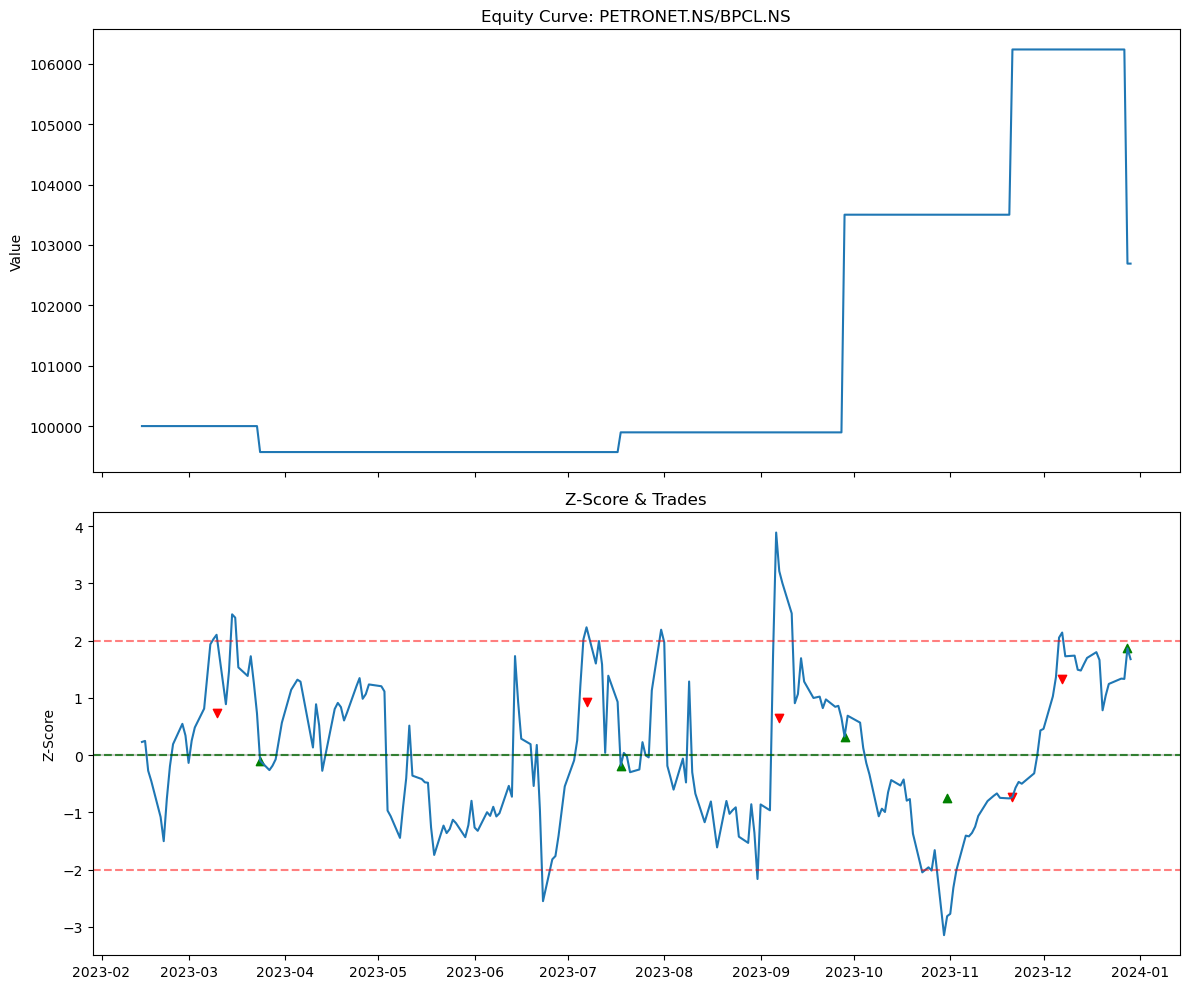

In [216]:
# Example usage:
if __name__ == "__main__":
    import statsmodels.api as sm
    
    backtester = PairsBacktester(
        ticker1="PETRONET.NS",
        ticker2="BPCL.NS",
        start_date="2023-01-01",
        end_date="2024-01-01",
        entry_threshold=2.0,
        exit_threshold=0.0,
        max_half_life_days=20,
        stop_loss_pct=0.10,
        transaction_cost_pct=0.001,
        slippage_pct=0.001,
        min_daily_volume=1000000
    )
    
    # Run backtest
    results = backtester.backtest()
    print("\nBacktest Results:")
    for key, value in results.items():
        if isinstance(value, float):
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}: {value}")
    
    # Plot results
    backtester.plot_results()